In [1]:
!pip install qiskit qiskit_aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt
     
def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc
     
def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc
     
def run_qft(n):
    """Executes QFT circuit and displays Bloch sphere representation."""
    qc = qft_circuit(n)
    # Create a simulator and save the statevector explicitly
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()
    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()
    # Retrieve statevector safely
    statevector = result.data(0)["statevector"]
    # Display results
    plot_bloch_multivector(statevector)
    plt.show()
    print(qc.draw(output='text'))
if __name__ == "__main__":
    n_qubits = 3
    print(f"Running Quantum Fourier Transform on {n_qubits} qubits...")
    run_qft(n_qubits)  

Running Quantum Fourier Transform on 3 qubits...
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      


In [15]:
# ============================================================
#  TASK 1 — Quantum Fourier Transform (QFT)
# Vary the number of qubits and observe how the circuit changes
# ============================================================
# Step 1: Install required packages (only once per environment)
# Step 2: Import required libraries
# ------------------------------------------------------------
# Step 3: Define helper functions for QFT
# ------------------------------------------------------------
def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)  # Apply Hadamard gate
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)  # Controlled phase gates
    qft_rotations(qc, n)
    return qc
def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc
def qft_circuit(n):
    """Build an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc
# ------------------------------------------------------------
# Step 4: Function to run and visualize QFT
# ------------------------------------------------------------
def run_qft(n):
    """Executes QFT circuit and displays Bloch sphere + circuit diagram."""
    print(f"\n Running Quantum Fourier Transform on {n} qubits...\n")
    
    qc = qft_circuit(n)
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()
    statevector = result.data(0)["statevector"]
    # Display Bloch sphere visualization
    plot_bloch_multivector(statevector)
    plt.show()
    # Display circuit diagram
    print("Quantum Circuit:")
    print(qc.draw(output='text'))
# ------------------------------------------------------------
# Step 5: Run the QFT for different numbers of qubits
# ------------------------------------------------------------
for n in [2, 3, 4]:
    run_qft(n)


 Running Quantum Fourier Transform on 2 qubits...

Quantum Circuit:
                   ┌───┐    statevector 
q_0: ──────■───────┤ H ├─X───────░──────
     ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ┤ H ├─■─────────────X───────░──────
     └───┘                       ░      

 Running Quantum Fourier Transform on 3 qubits...

Quantum Circuit:
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      

 Running Quantum Fourier Transform on 4 qubits...

Quantum Circuit:
                                                                          ┌───┐»
q_0: ──────■───────────────────────────────■───────────────

In [17]:
# ============================================================
#  TASK 2 — Inverse Quantum Fourier Transform (IQFT)
# ============================================================
# ------------------------------------------------------------
# Step 1: Define inverse QFT helper function
# ------------------------------------------------------------
def inverse_qft_rotations(qc, n):
    """Apply inverse QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    # Apply inverse operations in reverse order
    for qubit in range(n):
        qc.cp(-np.pi / 2**(n - qubit), qubit, n)  # Negative phase rotation
    qc.h(n)
    inverse_qft_rotations(qc, n)
    return qc

def inverse_qft_circuit(n):
    """Build an n-qubit Inverse Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    # Step 1: Reverse qubit order (swap)
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    # Step 2: Apply inverse rotations
    inverse_qft_rotations(qc, n)
    qc.name = "Inverse QFT"
    return qc
# ------------------------------------------------------------
# Step 2: Run and visualize the inverse QFT
# ------------------------------------------------------------
def run_inverse_qft(n):
    """Execute inverse QFT circuit and display Bloch sphere + circuit diagram."""
    print(f"\n Running Inverse Quantum Fourier Transform on {n} qubits...\n")
    
    qc = inverse_qft_circuit(n)
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()
    statevector = result.data(0)["statevector"]

    # Display Bloch sphere
    plot_bloch_multivector(statevector)
    plt.show()

    # Show circuit diagram
    print("Quantum Circuit:")
    print(qc.draw(output='text'))
# ------------------------------------------------------------
# Step 3: Run for multiple qubit sizes
# ------------------------------------------------------------
for n in [2, 3, 4]:
    run_inverse_qft(n)


 Running Inverse Quantum Fourier Transform on 2 qubits...

Quantum Circuit:
                  ┌───┐ statevector 
q_0: ─X──■────────┤ H ├──────░──────
      │  │P(-π/2) ├───┤      ░      
q_1: ─X──■────────┤ H ├──────░──────
                  └───┘      ░      

 Running Inverse Quantum Fourier Transform on 3 qubits...

Quantum Circuit:
                                      ┌───┐ statevector 
q_0: ─X──■───────────────────■────────┤ H ├──────░──────
      │  │                   │P(-π/2) ├───┤      ░      
q_1: ─┼──┼─────────■─────────■────────┤ H ├──────░──────
      │  │P(-π/4)  │P(-π/2)   ┌───┐   └───┘      ░      
q_2: ─X──■─────────■──────────┤ H ├──────────────░──────
                              └───┘              ░      

 Running Inverse Quantum Fourier Transform on 4 qubits...

Quantum Circuit:
                                                                       ┌───┐»
q_0: ─X─────■─────────────────────────────■───────────────────■────────┤ H ├»
      │     │                

In [21]:
# ============================================================
# TASK 3 — Integration with Phase Estimation using QFT
# ============================================================
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np
# -----------------------------
# Step 1: Define QFT
# -----------------------------
def qft_rotations(qc, n):
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2 ** (n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc
def swap_registers(qc, n):
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc
def qft_circuit(n):
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc
# -----------------------------
# Step 2: Define Phase Estimation Circuit
# -----------------------------
def phase_estimation(num_counting_qubits, phase):
    """
    Quantum Phase Estimation Circuit
    num_counting_qubits: number of qubits used for phase estimation precision
    phase: the unknown phase to be estimated (as a fraction, e.g., 0.25)
    """
    # One target qubit initialized in |1> (eigenstate)
    qc = QuantumCircuit(num_counting_qubits + 1, num_counting_qubits)
    qc.x(num_counting_qubits)
    # Step 1: Apply Hadamard to counting qubits
    for q in range(num_counting_qubits):
        qc.h(q)
    # Step 2: Controlled Unitary Operations (simulate e^(2πi * phase))
    for q in range(num_counting_qubits):
        qc.cp(2 * np.pi * phase * (2 ** q), q, num_counting_qubits)
    # Step 3: Apply inverse QFT to counting register
    qft_dagger = qft_circuit(num_counting_qubits).inverse()
    qc.append(qft_dagger, range(num_counting_qubits))
    # Step 4: Measure counting qubits
    qc.measure(range(num_counting_qubits), range(num_counting_qubits))
    return qc
# -----------------------------
# Step 3: Run the circuit
# -----------------------------
num_counting_qubits = 3
phase_to_estimate = 0.25  # True phase = 1/4 = 0.25
qc = phase_estimation(num_counting_qubits, phase_to_estimate)
# Simulate
simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=2048).result()
counts = result.get_counts()
# -----------------------------
# Step 4: Display results
# -----------------------------
print("Quantum Phase Estimation Circuit:")
print(qc.draw(output="text"))
# Convert the most frequent result to a phase value
measured_bin = max(counts, key=counts.get)
measured_decimal = int(measured_bin, 2)
estimated_phase = measured_decimal / (2 ** num_counting_qubits)
print("\nMeasured bitstring:", measured_bin)
print("Estimated phase:", round(estimated_phase, 3))
print("Actual phase:", phase_to_estimate)

Quantum Phase Estimation Circuit:
     ┌───┐                        ┌─────────┐┌─┐      
q_0: ┤ H ├─■──────────────────────┤0        ├┤M├──────
     ├───┤ │                      │         │└╥┘┌─┐   
q_1: ┤ H ├─┼────────■─────────────┤1 QFT_dg ├─╫─┤M├───
     ├───┤ │        │             │         │ ║ └╥┘┌─┐
q_2: ┤ H ├─┼────────┼──────■──────┤2        ├─╫──╫─┤M├
     ├───┤ │P(π/2)  │P(π)  │P(2π) └─────────┘ ║  ║ └╥┘
q_3: ┤ X ├─■────────■──────■──────────────────╫──╫──╫─
     └───┘                                    ║  ║  ║ 
c: 3/═════════════════════════════════════════╩══╩══╩═
                                              0  1  2 

Measured bitstring: 010
Estimated phase: 0.25
Actual phase: 0.25


In [25]:
# ============================================================
# TASK 4 — Measure Output States
# Add measurements and simulate the probability distribution
# ============================================================
# -----------------------------
# Step 1: Define QFT Functions
# -----------------------------
def qft_rotations(qc, n):
    """Recursively apply QFT rotations on n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)  # Apply Hadamard gate
    for qubit in range(n):
        # Apply controlled-phase rotation
        qc.cp(np.pi / 2 ** (n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

def qft_circuit(n):
    """Construct the complete QFT circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

# -----------------------------
# Step 2: Define Phase Estimation Circuit
# -----------------------------
def phase_estimation(num_counting_qubits, phase):
    """
    Build a simple Quantum Phase Estimation circuit that integrates QFT.
    num_counting_qubits: precision of the phase estimation
    phase: the true phase value to estimate
    """
    qc = QuantumCircuit(num_counting_qubits + 1, num_counting_qubits)
    
    # Initialize the target qubit to |1>
    qc.x(num_counting_qubits)

    # Apply Hadamard gates to the counting qubits
    for q in range(num_counting_qubits):
        qc.h(q)

    # Apply controlled phase operations (simulate the unitary U)
    for q in range(num_counting_qubits):
        qc.cp(2 * np.pi * phase * (2 ** q), q, num_counting_qubits)

    # Apply the inverse QFT to the counting qubits
    qft_dagger = qft_circuit(num_counting_qubits).inverse()
    qc.append(qft_dagger, range(num_counting_qubits))

    # Measure the counting qubits
    qc.measure(range(num_counting_qubits), range(num_counting_qubits))

    return qc

# -----------------------------
# Step 3: Run and Simulate
# -----------------------------
num_counting_qubits = 3
phase_to_estimate = 0.25  # True phase = 1/4

# Build the Phase Estimation circuit
qc = phase_estimation(num_counting_qubits, phase_to_estimate)

# Use Aer simulator
simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=2048).result()

# Retrieve measured counts
counts = result.get_counts()

# -----------------------------
# Step 4: Display Circuit and Results
# -----------------------------
print("Quantum Phase Estimation Circuit:")
print(qc.draw(output="text"))

# Find most frequent measurement result
measured_bin = max(counts, key=counts.get)
measured_decimal = int(measured_bin, 2)
estimated_phase = measured_decimal / (2 ** num_counting_qubits)

print("\nMeasured bitstring:", measured_bin)
print("Estimated phase:", round(estimated_phase, 3))
print("Actual phase:", phase_to_estimate)

Quantum Phase Estimation Circuit:
     ┌───┐                        ┌─────────┐┌─┐      
q_0: ┤ H ├─■──────────────────────┤0        ├┤M├──────
     ├───┤ │                      │         │└╥┘┌─┐   
q_1: ┤ H ├─┼────────■─────────────┤1 QFT_dg ├─╫─┤M├───
     ├───┤ │        │             │         │ ║ └╥┘┌─┐
q_2: ┤ H ├─┼────────┼──────■──────┤2        ├─╫──╫─┤M├
     ├───┤ │P(π/2)  │P(π)  │P(2π) └─────────┘ ║  ║ └╥┘
q_3: ┤ X ├─■────────■──────■──────────────────╫──╫──╫─
     └───┘                                    ║  ║  ║ 
c: 3/═════════════════════════════════════════╩══╩══╩═
                                              0  1  2 

Measured bitstring: 010
Estimated phase: 0.25
Actual phase: 0.25


Quantum Phase Estimation Circuit:


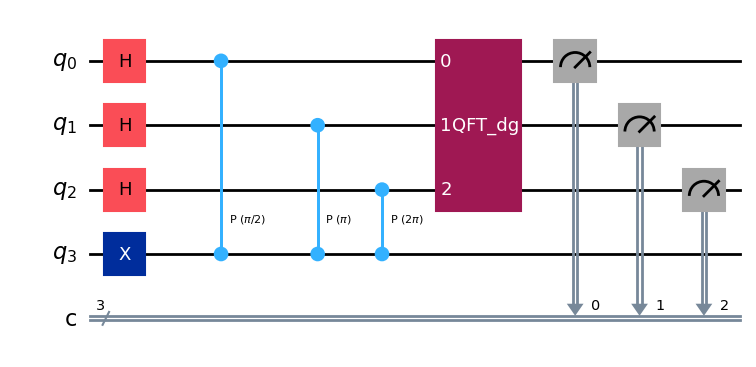


Measured bitstring: 010
Estimated phase: 0.25
Actual phase: 0.25


In [27]:
# ============================================================
# TASK 5 — Circuit Visualization
# Use qc.draw('mpl') to plot the circuit diagram
# ============================================================
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
# -----------------------------
# Step 1: Define QFT Functions
# -----------------------------
def qft_rotations(qc, n):
    """Recursively apply QFT rotations on n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2 ** (n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

def qft_circuit(n):
    """Construct the complete QFT circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

# -----------------------------
# Step 2: Define Phase Estimation Circuit
# -----------------------------
def phase_estimation(num_counting_qubits, phase):
    """Quantum Phase Estimation circuit integrating QFT."""
    qc = QuantumCircuit(num_counting_qubits + 1, num_counting_qubits)
    qc.x(num_counting_qubits)
    for q in range(num_counting_qubits):
        qc.h(q)
    for q in range(num_counting_qubits):
        qc.cp(2 * np.pi * phase * (2 ** q), q, num_counting_qubits)
    qft_dagger = qft_circuit(num_counting_qubits).inverse()
    qc.append(qft_dagger, range(num_counting_qubits))
    qc.measure(range(num_counting_qubits), range(num_counting_qubits))
    return qc

# -----------------------------
# Step 3: Run and Simulate
# -----------------------------
num_counting_qubits = 3
phase_to_estimate = 0.25
qc = phase_estimation(num_counting_qubits, phase_to_estimate)
simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=2048).result()
counts = result.get_counts()

# -----------------------------
# Step 4: Display Results
# -----------------------------
print("Quantum Phase Estimation Circuit:")
display(qc.draw('mpl'))  # Visualize the circuit diagram graphically

measured_bin = max(counts, key=counts.get)
measured_decimal = int(measured_bin, 2)
estimated_phase = measured_decimal / (2 ** num_counting_qubits)

print("\nMeasured bitstring:", measured_bin)
print("Estimated phase:", round(estimated_phase, 3))
print("Actual phase:", phase_to_estimate)
